# K-Means Clustering 
# Sanjay Gupta
# Date: 22-August-2021

# Importing Libraries

In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

# Load the Dataset

In [2]:
#specify URL where data is located
url = 'https://raw.githubusercontent.com/sanjaygupta1963/Pythoncoding/main/Iris.csv'

# Load Dataset from the Github URL
df = pd.read_csv(url)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Show the Unique Count of Values in the Species Column
df['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [6]:
# Dropping irrelevant Columns "X1", "id", "latitude", "longitude"
df.drop(["Id"], axis=1, inplace=True)

In [7]:
# statistics of the data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# Exploring the columns of the dataframe
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

# Standardize the Data

In [9]:
# This Slicing is important for running the Statistics. 
# Otherwise on NON-Numeric Columns Python Statistical Function will Prompt errors.

dfnum = df.select_dtypes([np.float64])

In [10]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(dfnum)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1,2,3
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-2.775558e-16,-5.140333e-16,1.154632e-16,9.251859e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


In [11]:
# defining the kmeans function with initialization as k-means++
# n_clustersint, default=8 : The number of clusters to form as well as the number of centroids to generate.
# init{‘k-means++’, ‘random’}, callable or array-like of shape (n_clusters, n_features), default=’k-means++’

# For this particular algorithm to work, the number of clusters has to be defined beforehand. 
# The K in the K-means refers to the number of clusters.
# Value 4 is a arbitrary value.

kmeans = KMeans(n_clusters=4, init='k-means++')
print(kmeans)

KMeans(n_clusters=4)


In [12]:
# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)
print('1) K Means Model >>>\n',kmeans)
print('2) Corresponding labels for each Row >>>\n',kmeans.labels_)
print('3) Finding the center of the clusters or cluster Centroids >>>\n',kmeans.cluster_centers_)

1) K Means Model >>>
 KMeans(n_clusters=4)
2) Corresponding labels for each Row >>>
 [1 3 3 3 1 1 3 1 3 3 1 3 3 3 1 1 1 1 1 1 1 1 1 3 3 3 1 1 1 3 3 1 1 1 3 3 1
 3 3 1 1 3 3 1 1 3 1 3 1 3 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 2 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
3) Finding the center of the clusters or cluster Centroids >>>
 [[-0.05021989 -0.88029181  0.34753171  0.28206327]
 [-0.73463631  1.45201075 -1.29704352 -1.21071997]
 [ 1.13597027  0.09659843  0.996271    1.01717187]
 [-1.34320731  0.12656736 -1.31407576 -1.30726051]]


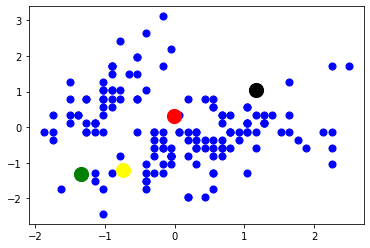

In [13]:
# Plot a Scatter graph, displaying the cluster centroids
plt.scatter(data_scaled[ : , 0], data_scaled[ : , 1], s =50, c='blue')
plt.scatter(-1.34320731, -1.30726051, s=200, c='green', marker='o')
plt.scatter(-0.01139555, 0.31165355, s=200, c='red', marker='o')
plt.scatter(-0.73463631, -1.21071997, s=200, c='yellow', marker='o')
plt.scatter(1.16743407, 1.02963256, s=200, c='black', marker='o')
plt.show()

In [14]:
# Inertia on the fitted data
# Inertia actually calculates the sum of distances of all the points within a cluster from the centroid of that cluster.
# Keeping this in mind, we can say that the lesser the inertia value, the better our clusters are.
kmeans.inertia_

114.42714544645858

C:\Users\sanja\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\sanja\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sanja\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\sanja\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated i

Text(0, 0.5, 'Inertia')

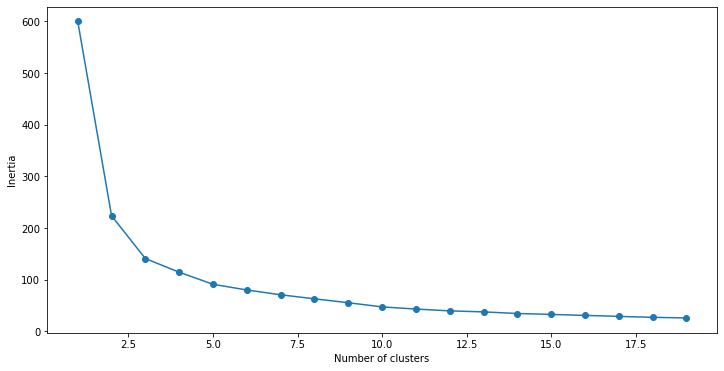

In [15]:
# The Elbow Method is one of the most popular methods to determine this optimal value of k.

# Fitting multiple k-means algorithms and storing the values in an empty list
# Inertia measures how well a dataset was clustered by K-Means. 
# It is calculated by measuring the distance between each data point and its centroid, squaring this distance, 
# and summing these squares across one cluster. A good model is one with low inertia AND a low number of clusters ( K ).
# Sum of Squared Error(SSE): SSE is defined as the sum of the squared distance between centroid and each member of the cluster.

SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)
    
    
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [16]:
# Now decide the Value of K by carefully understanding the above Elbow Curve.
# K means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 5, init='k-means++')
model=kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)
centorids = model.cluster_centers_
klabel=kmeans.labels_
#kmeans.cluster_centers_

C:\Users\sanja\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


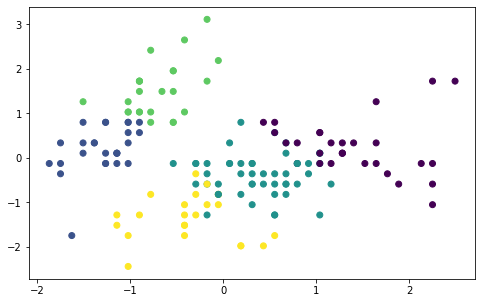

In [17]:
# Visualize it:
plt.figure(figsize=(8, 5))
plt.scatter(data_scaled[:,0], data_scaled[:,1], c=model.labels_.astype(float))

In [18]:
centorids

array([[ 1.39733017,  0.24209538,  1.16081857,  1.21674456],
       [-1.3014672 ,  0.20434662, -1.30846527, -1.29780677],
       [ 0.38167879, -0.38528594,  0.60874736,  0.56599114],
       [-0.70378338,  1.53343032, -1.30099253, -1.20889396],
       [-0.35279167, -1.33227742,  0.10262199,  0.01318541]])

In [19]:
kmeans.labels_

array([3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 1, 1, 1, 1, 3, 3, 1, 1, 3, 3, 3, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3,
       3, 1, 3, 1, 3, 1, 0, 2, 0, 4, 2, 2, 2, 4, 2, 4, 4, 2, 4, 2, 4, 2,
       2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2, 2, 2, 4,
       2, 4, 4, 2, 4, 4, 4, 2, 2, 2, 4, 4, 0, 2, 0, 2, 0, 0, 4, 0, 2, 0,
       0, 2, 0, 2, 2, 0, 2, 0, 0, 4, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0,
       2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2])

In [20]:
pred

array([3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 1, 1, 1, 1, 3, 3, 1, 1, 3, 3, 3, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3,
       3, 1, 3, 1, 3, 1, 0, 2, 0, 4, 2, 2, 2, 4, 2, 4, 4, 2, 4, 2, 4, 2,
       2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2, 2, 2, 4,
       2, 4, 4, 2, 4, 4, 4, 2, 2, 2, 4, 4, 0, 2, 0, 2, 0, 0, 4, 0, 2, 0,
       0, 2, 0, 2, 2, 0, 2, 0, 0, 4, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0,
       2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2])

In [21]:
kmeans.cluster_centers_

array([[ 1.39733017,  0.24209538,  1.16081857,  1.21674456],
       [-1.3014672 ,  0.20434662, -1.30846527, -1.29780677],
       [ 0.38167879, -0.38528594,  0.60874736,  0.56599114],
       [-0.70378338,  1.53343032, -1.30099253, -1.20889396],
       [-0.35279167, -1.33227742,  0.10262199,  0.01318541]])

In [22]:
# Convert the Data_SCaled Array into Dataframe.
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

2    48
0    29
1    26
3    24
4    23
Name: cluster, dtype: int64

In [23]:
# Print the Frame as how the data is organized there.
frame

,0,1,2,3,cluster
0,-0.900681,1.032057,-1.341272,-1.312977,3
1,-1.143017,-0.124958,-1.341272,-1.312977,1
2,-1.385353,0.337848,-1.398138,-1.312977,1
3,-1.506521,0.106445,-1.284407,-1.312977,1
4,-1.021849,1.263460,-1.341272,-1.312977,3
...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,0
146,0.553333,-1.281972,0.705893,0.922064,2
147,0.795669,-0.124958,0.819624,1.053537,2
148,0.432165,0.800654,0.933356,1.447956,0


In [24]:
frame[1]

0      1.032057
1     -0.124958
2      0.337848
3      0.106445
4      1.263460
         ...   
145   -0.124958
146   -1.281972
147   -0.124958
148    0.800654
149   -0.124958
Name: 1, Length: 150, dtype: float64

In [25]:
# Print Original Dataframe
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [26]:
# Adding the Predicted Cluster Value in the Original Dataset. 
# Join to the Two Dataframes.
dfnew = pd.concat([df, frame['cluster']], axis=1, join='inner')
dfnew

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,3
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,3
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,0


In [27]:
# Display Data in the Pivot Table
pd.pivot_table(dfnew,index=['cluster','Species'], values=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'], aggfunc='max')

PetalLengthCm  PetalWidthCm  SepalLengthCm  \
cluster Species                                                       
0       Iris-versicolor            4.9           1.5            7.0   
        Iris-virginica             6.9           2.5            7.9   
1       Iris-setosa                1.9           0.5            5.1   
2       Iris-versicolor            5.1           1.8            6.8   
        Iris-virginica             5.8           2.4            6.7   
3       Iris-setosa                1.9           0.6            5.8   
4       Iris-versicolor            4.5           1.5            6.3   
        Iris-virginica             5.0           1.7            6.0   

                         SepalWidthCm  
cluster Species                        
0       Iris-versicolor           3.2  
        Iris-virginica            3.8  
1       Iris-setosa               3.4  
2       Iris-versicolor           3.4  
        Iris-virginica            3.1  
3       Iris-setosa               4.4  
4       Iris-versicolor           2.9  
        Iris-virginica            2.5

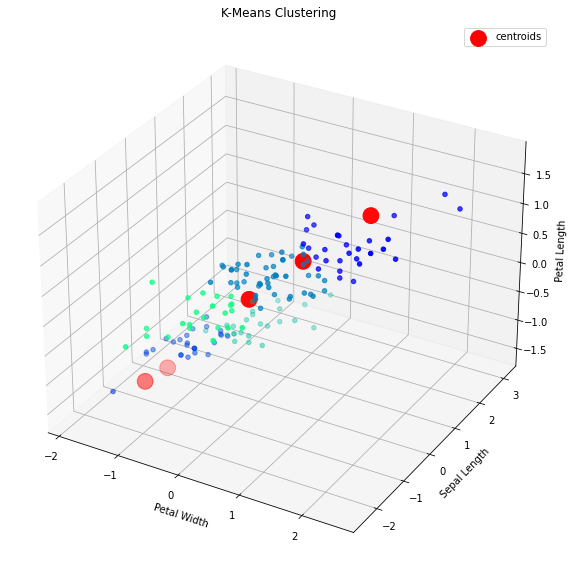

In [28]:
# Visualizing the Clustering
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


#Plot the clusters obtained using K-means
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(10)
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(kmeans.cluster_centers_[:, 3],
            kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 2],
            s = 250,
            marker='o',
            c='red',
            label='centroids')
scatter = ax.scatter(frame[0],frame[1], frame[2],c=pred,s=20, cmap='winter')

ax.set_title('K-Means Clustering')
ax.set_xlabel('Petal Width')
ax.set_ylabel('Sepal Length')
ax.set_zlabel('Petal Length')
ax.legend()
plt.show()